In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sqlite3
import seaborn as sns
import numpy.polynomial.polynomial as poly

In [45]:
df=pd.read_csv(r'C:\Users\pauli\Desktop\DataScienceNotebooks\DATA\auto.csv', delimiter= '|')
# df['miestas2']= df['Sav.'].apply(lambda x: x[0:4])
# df = df.drop_duplicates(subset=['miestas2'], keep='first')
df.head()

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
1,1,ID:23120069,Mitsubishi,Outlander,2006,195 405 km,"2378 cm³, 160 AG (118kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
2,2,ID:23012308,Seat,Arona,2019-11,129 800 km,"1598 cm³, 95 AG (70kW)",Dyzelinas,Priekiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
3,3,ID:23051810,Skoda,Octavia Scout,2015-06,183 000 km,"1798 cm³, 179 AG (132kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
4,4,ID:23117259,Volvo,XC90,2018-08,127 896 km,"1969 cm³, 235 AG (173kW)",Dyzelinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df['price']= df['price'].apply(lambda x: float(x.replace(' ','')))

In [47]:
df = df[df['rida'] != 'Nenurodyta']

In [48]:
df['rida']= df['rida'].apply(lambda x: float(x.replace(' ','').replace('km','')))

In [49]:
df['ridosintervalai']=np.ceil(df['rida']/5000)*5000

In [50]:
df5=df.groupby('ridosintervalai')['price'].mean().reset_index()
df5.columns = ['rida', 'kaina']
df5['rida']= df5['rida'].apply(lambda x: float(x))

In [51]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rida    107 non-null    float64
 1   kaina   107 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [52]:
df5= df5[df5['rida'] <500000]

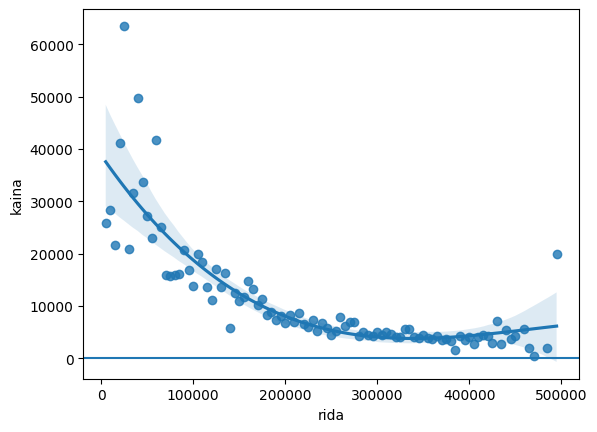

In [55]:
ax=sns.regplot(data=df5, x='rida', y = 'kaina', order=3)
ax.axhline(y=0)
plt.show()

In [56]:
coef = np.polyfit(x=df5['rida'], y=df5['kaina'], deg=1)
print(coef)

[-5.79202586e-02  2.51113772e+04]


In [57]:
fn_fit=poly.Polynomial(coef[::-1])


In [58]:
fn_fit

Polynomial([ 2.51113772e+04, -5.79202586e-02], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [59]:
r=300000
t_kaina = fn_fit(r)
print(t_kaina)

7735.2996092797075


[-4.21319994e-13  5.90640661e-07 -2.55117114e-01  3.87996394e+04]


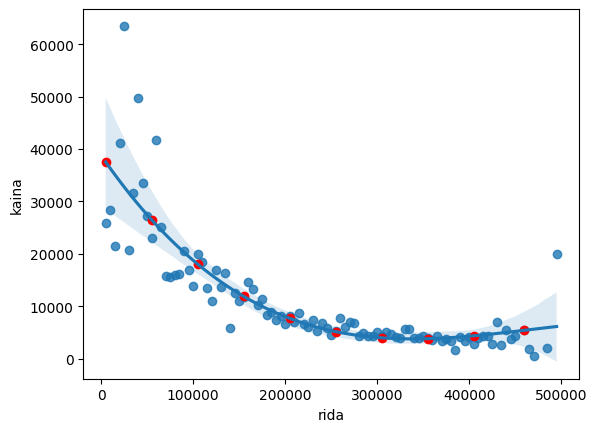

In [61]:
coef = np.polyfit(x=df5['rida'], y=df5['kaina'], deg=3)
print(coef)
fn_fit = poly.Polynomial(coef[::-1])
kainos_fitted = fn_fit(df5['rida'])
df5['K_fit'] = kainos_fitted

ax = sns.regplot(data=df5, x='rida', y='kaina', order=3)
ax.scatter(x=df5['rida'][::10], y=df5['K_fit'][::10], c='red')

plt.show()

In [66]:
fn_fit(300000)

np.float64(4046.5248480860464)